In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # plotting
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold,RFE,SelectKBest,f_regression,mutual_info_regression
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, chi2
import sklearn.metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import  mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR, NuSVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge, ARDRegression
from sklearn.linear_model import Ridge, RidgeCV, SGDRegressor, ElasticNet, ElasticNetCV, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, LassoLarsIC

In [2]:
dataset1 = pd.read_csv('motornew.csv')
df=dataset1
df.info()
prof_id = 6

curr_df = df[df['profile_id'] == prof_id]

curr_df = curr_df.drop('profile_id', axis = 1)
columns = curr_df.columns.tolist()
scaler = MinMaxScaler()

scurr_df = pd.DataFrame(scaler.fit_transform(curr_df), columns= columns)
scurr_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40387 entries, 0 to 40386
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ambient         40387 non-null  float64
 1   coolant         40387 non-null  float64
 2   u_d             40387 non-null  float64
 3   u_q             40387 non-null  float64
 4   motor_speed     40387 non-null  float64
 5   torque          40387 non-null  float64
 6   i_d             40387 non-null  float64
 7   i_q             40387 non-null  float64
 8   pm              40387 non-null  float64
 9   stator_yoke     40387 non-null  float64
 10  stator_tooth    40387 non-null  float64
 11  stator_winding  40387 non-null  float64
 12  profile_id      40387 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 4.0 MB


,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,0.422350,0.064550,0.495541,0.173390,0.000066,0.605967,0.957416,0.635014,0.000142,0.000600,0.000105,0.000711
1,0.424296,0.064815,0.495157,0.174028,0.000064,0.610011,0.955582,0.640728,0.000089,0.000826,0.000087,0.000582
2,0.425627,0.064977,0.494894,0.174470,0.000063,0.612710,0.954268,0.644823,0.000089,0.000758,0.000058,0.000427
3,0.426669,0.065209,0.494701,0.174815,0.000062,0.614798,0.953327,0.647756,0.000003,0.000342,0.000021,0.000326
4,0.427242,0.065387,0.494559,0.175044,0.000060,0.616119,0.952652,0.649859,0.000000,0.000086,0.000013,0.000273


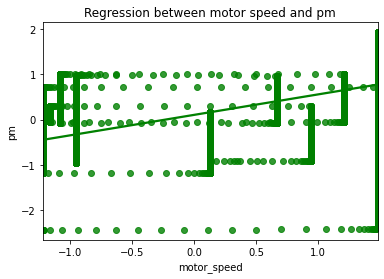

In [3]:
plt.title('Regression between motor speed and pm')
sns.regplot(x=curr_df['motor_speed'],y=curr_df['pm'], color='g')
plt.show()

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

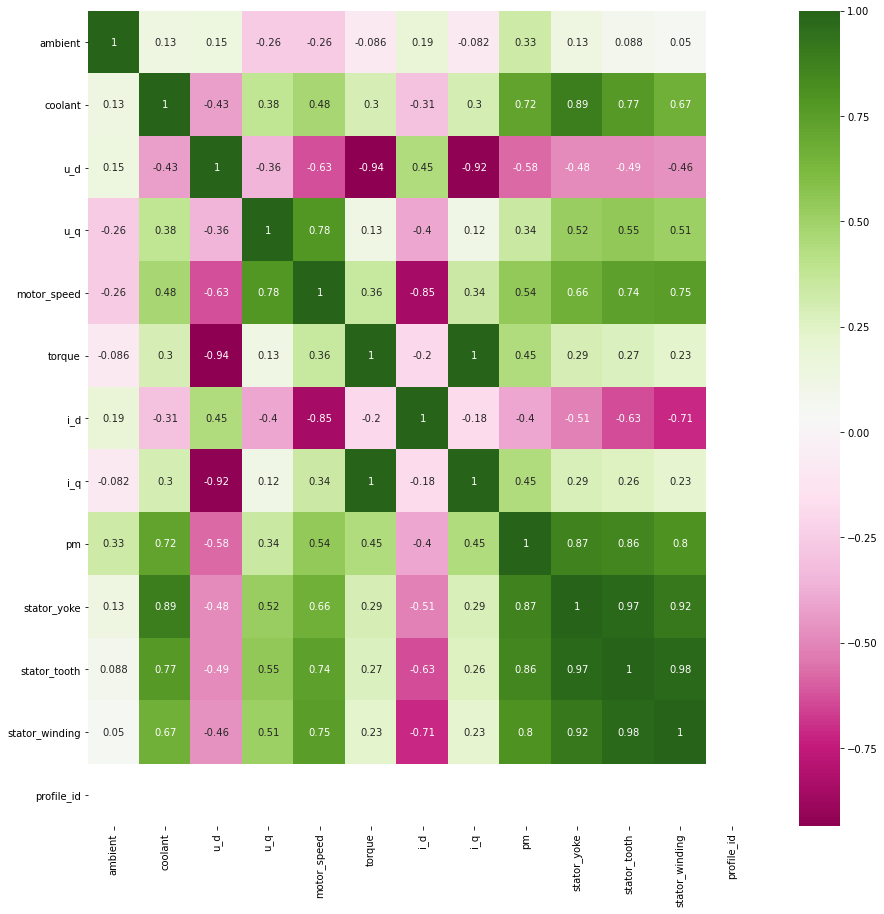

In [4]:
plt.figure(figsize=(8, 8))
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
#Before Feature Scaling
X = curr_df.drop(['pm'], axis = 1)
y = curr_df['pm']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predicting the test set result
y_pred_logreg = regressor.predict(X_test)

EVC=explained_variance_score(y_test, y_pred_logreg)
ME=max_error(y_test, y_pred_logreg)
MAE=mean_absolute_error(y_test, y_pred_logreg)
MSE=mean_squared_error(y_test, y_pred_logreg)
MDAE=median_absolute_error(y_test, y_pred_logreg)
RS=r2_score(y_test, y_pred_logreg)
dfreg=pd.DataFrame(columns = ['Regressor','EVC','ME', 'MAE','MSE','MDAE','RS'])
#L2=['LinearRegressor','explained_variance_score','max_error', 'mean_absolute_error','mean_squared_error','median_absolute_error','r2_score']
#dfreg.loc[len(dfreg),:]=L2
L2=["LinearRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfreg.loc[len(dfreg),:]=L2
dfreg

,Regressor,EVC,ME,MAE,MSE,MDAE,RS
0,LinearRegressor,0.927315,1.3472,0.175612,0.056735,0.128325,0.927278


In [6]:
from sklearn.ensemble import AdaBoostRegressor
adaregressor = AdaBoostRegressor()
adaregressor.fit(X_train, y_train)

# predicting the test set result
y_pred_adareg = adaregressor.predict(X_test)

EVC=explained_variance_score(y_test, y_pred_adareg)
ME=max_error(y_test, y_pred_adareg)
MAE=mean_absolute_error(y_test, y_pred_adareg)
MSE=mean_squared_error(y_test, y_pred_adareg)
MDAE=median_absolute_error(y_test, y_pred_adareg)
RS=r2_score(y_test, y_pred_adareg)
L2=["AdaBoostRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfreg.loc[len(dfreg),:]=L2
dfreg

,Regressor,EVC,ME,MAE,MSE,MDAE,RS
0,LinearRegressor,0.927315,1.3472,0.175612,0.056735,0.128325,0.927278
1,AdaBoostRegressor,0.953573,0.586911,0.158985,0.0367895,0.142634,0.952844


In [7]:
from sklearn.ensemble import BaggingRegressor
baregressor = BaggingRegressor()
baregressor.fit(X_train, y_train)

# predicting the test set result
y_pred_bareg = baregressor.predict(X_test)

EVC=explained_variance_score(y_test, y_pred_bareg)
ME=max_error(y_test, y_pred_bareg)
MAE=mean_absolute_error(y_test, y_pred_bareg)
MSE=mean_squared_error(y_test, y_pred_bareg)
MDAE=median_absolute_error(y_test, y_pred_bareg)
RS=r2_score(y_test, y_pred_bareg)
L2=["BaggingRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfreg.loc[len(dfreg),:]=L2

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
etregressor = ExtraTreesRegressor()
etregressor.fit(X_train, y_train)

# predicting the test set result
y_pred_etreg = etregressor.predict(X_test)

EVC=explained_variance_score(y_test, y_pred_etreg)
ME=max_error(y_test, y_pred_etreg)
MAE=mean_absolute_error(y_test, y_pred_etreg)
MSE=mean_squared_error(y_test, y_pred_etreg)
MDAE=median_absolute_error(y_test, y_pred_etreg)
RS=r2_score(y_test, y_pred_etreg)
L2=["ExtraTreesRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfreg.loc[len(dfreg),:]=L2

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
gbregressor = GradientBoostingRegressor()
gbregressor.fit(X_train, y_train)

# predicting the test set result
y_pred_gbreg = gbregressor.predict(X_test)

EVC=explained_variance_score(y_test, y_pred_gbreg)
ME=max_error(y_test, y_pred_gbreg)
MAE=mean_absolute_error(y_test, y_pred_gbreg)
MSE=mean_squared_error(y_test, y_pred_gbreg)
MDAE=median_absolute_error(y_test, y_pred_gbreg)
RS=r2_score(y_test, y_pred_gbreg)
L2=["GradientBoostingRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfreg.loc[len(dfreg),:]=L2

In [10]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()
rfregressor.fit(X_train, y_train)

# predicting the test set result
y_pred_rfreg = rfregressor.predict(X_test)

EVC=explained_variance_score(y_test, y_pred_rfreg)
ME=max_error(y_test, y_pred_rfreg)
MAE=mean_absolute_error(y_test, y_pred_rfreg)
MSE=mean_squared_error(y_test, y_pred_rfreg)
MDAE=median_absolute_error(y_test, y_pred_rfreg)
RS=r2_score(y_test, y_pred_rfreg)
L2=["RandomForestRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfreg.loc[len(dfreg),:]=L2

In [11]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred_enreg = regr.predict(X_test)

EVC=explained_variance_score(y_test, y_pred_enreg)
ME=max_error(y_test, y_pred_enreg)
MAE=mean_absolute_error(y_test, y_pred_enreg)
MSE=mean_squared_error(y_test, y_pred_enreg)
MDAE=median_absolute_error(y_test, y_pred_enreg)
RS=r2_score(y_test, y_pred_enreg)
L2=["ElasticNet",EVC,ME,MAE,MSE,MDAE,RS]
dfreg.loc[len(dfreg),:]=L2

In [12]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(X_train, y_train)
y_pred_svreg =svr_regressor.predict(X_test)

EVC=explained_variance_score(y_test, y_pred_svreg)
ME=max_error(y_test, y_pred_svreg)
MAE=mean_absolute_error(y_test, y_pred_svreg)
MSE=mean_squared_error(y_test, y_pred_svreg)
MDAE=median_absolute_error(y_test, y_pred_svreg)
RS=r2_score(y_test, y_pred_svreg)
L2=["SVR",EVC,ME,MAE,MSE,MDAE,RS]
dfreg.loc[len(dfreg),:]=L2

In [13]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X_train, y_train)
y_pred_dtreg =tree_regressor.predict(X_test)

EVC=explained_variance_score(y_test, y_pred_dtreg)
ME=max_error(y_test, y_pred_dtreg)
MAE=mean_absolute_error(y_test, y_pred_dtreg)
MSE=mean_squared_error(y_test, y_pred_dtreg)
MDAE=median_absolute_error(y_test, y_pred_dtreg)
RS=r2_score(y_test, y_pred_dtreg)
L2=["DecisionTreeRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfreg.loc[len(dfreg),:]=L2

In [14]:
dfreg

,Regressor,EVC,ME,MAE,MSE,MDAE,RS
0,LinearRegressor,0.927315,1.3472,0.175612,0.056735,0.128325,0.927278
1,AdaBoostRegressor,0.953573,0.586911,0.158985,0.0367895,0.142634,0.952844
2,BaggingRegressor,0.999732,0.760559,0.00389025,0.000209001,0.00142167,0.999732
3,ExtraTreesRegressor,0.999963,0.148578,0.00256971,2.85467e-05,0.000925221,0.999963
4,GradientBoostingRegressor,0.995161,0.698291,0.0445664,0.00377956,0.0330131,0.995155
5,RandomForestRegressor,0.999793,0.615009,0.00355601,0.000161811,0.00130064,0.999793
6,ElasticNet,0.328568,2.472,0.596371,0.523929,0.56557,0.328437
7,SVR,0.989845,1.04778,0.0703632,0.0079776,0.0656274,0.989774
8,DecisionTreeRegressor,0.999436,1.07418,0.00405152,0.000440153,0.00086262,0.999436


In [15]:
# WITH FEATURE SCALING

X = curr_df.drop(['pm'], axis = 1)
y = curr_df['pm']

sc_X = StandardScaler()
X= sc_X.fit_transform(X)

SX_train, SX_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(SX_train, y_train)

# predicting the test set result
y_pred_logreg = regressor.predict(SX_test)

EVC=explained_variance_score(y_test, y_pred_logreg)
ME=max_error(y_test, y_pred_logreg)
MAE=mean_absolute_error(y_test, y_pred_logreg)
MSE=mean_squared_error(y_test, y_pred_logreg)
MDAE=median_absolute_error(y_test, y_pred_logreg)
RS=r2_score(y_test, y_pred_logreg)
dfregfs=pd.DataFrame(columns = ['Regressor','EVC','ME', 'MAE','MSE','MDAE','RS'])
#L2=['LinearRegressor','explained_variance_score','max_error', 'mean_absolute_error','mean_squared_error','median_absolute_error','r2_score']
#dfreg.loc[len(dfreg),:]=L2
L2=["LinearRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfregfs.loc[len(dfregfs),:]=L2



from sklearn.ensemble import AdaBoostRegressor
adaregressor = AdaBoostRegressor()
adaregressor.fit(SX_train, y_train)

# predicting the test set result
y_pred_adareg = adaregressor.predict(SX_test)

EVC=explained_variance_score(y_test, y_pred_adareg)
ME=max_error(y_test, y_pred_adareg)
MAE=mean_absolute_error(y_test, y_pred_adareg)
MSE=mean_squared_error(y_test, y_pred_adareg)
MDAE=median_absolute_error(y_test, y_pred_adareg)
RS=r2_score(y_test, y_pred_adareg)
L2=["AdaBoostRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfregfs.loc[len(dfregfs),:]=L2




from sklearn.ensemble import BaggingRegressor
baregressor = BaggingRegressor()
baregressor.fit(SX_train, y_train)

# predicting the test set result
y_pred_bareg = baregressor.predict(SX_test)

EVC=explained_variance_score(y_test, y_pred_bareg)
ME=max_error(y_test, y_pred_bareg)
MAE=mean_absolute_error(y_test, y_pred_bareg)
MSE=mean_squared_error(y_test, y_pred_bareg)
MDAE=median_absolute_error(y_test, y_pred_bareg)
RS=r2_score(y_test, y_pred_bareg)
L2=["BaggingRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfregfs.loc[len(dfregfs),:]=L2



from sklearn.ensemble import ExtraTreesRegressor
etregressor = ExtraTreesRegressor()
etregressor.fit(SX_train, y_train)

# predicting the test set result
y_pred_etreg = etregressor.predict(SX_test)

EVC=explained_variance_score(y_test, y_pred_etreg)
ME=max_error(y_test, y_pred_etreg)
MAE=mean_absolute_error(y_test, y_pred_etreg)
MSE=mean_squared_error(y_test, y_pred_etreg)
MDAE=median_absolute_error(y_test, y_pred_etreg)
RS=r2_score(y_test, y_pred_etreg)
L2=["ExtraTreesRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfregfs.loc[len(dfregfs),:]=L2



from sklearn.ensemble import GradientBoostingRegressor
gbregressor = GradientBoostingRegressor()
gbregressor.fit(SX_train, y_train)

# predicting the test set result
y_pred_gbreg = gbregressor.predict(SX_test)

EVC=explained_variance_score(y_test, y_pred_gbreg)
ME=max_error(y_test, y_pred_gbreg)
MAE=mean_absolute_error(y_test, y_pred_gbreg)
MSE=mean_squared_error(y_test, y_pred_gbreg)
MDAE=median_absolute_error(y_test, y_pred_gbreg)
RS=r2_score(y_test, y_pred_gbreg)
L2=["GradientBoostingRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfregfs.loc[len(dfregfs),:]=L2



from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()
rfregressor.fit(SX_train, y_train)

# predicting the test set result
y_pred_rfreg = rfregressor.predict(SX_test)

EVC=explained_variance_score(y_test, y_pred_rfreg)
ME=max_error(y_test, y_pred_rfreg)
MAE=mean_absolute_error(y_test, y_pred_rfreg)
MSE=mean_squared_error(y_test, y_pred_rfreg)
MDAE=median_absolute_error(y_test, y_pred_rfreg)
RS=r2_score(y_test, y_pred_rfreg)
L2=["RandomForestRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfregfs.loc[len(dfregfs),:]=L2




from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
regr = ElasticNet(random_state=0)
regr.fit(SX_train, y_train)
y_pred_enreg = regr.predict(SX_test)

EVC=explained_variance_score(y_test, y_pred_enreg)
ME=max_error(y_test, y_pred_enreg)
MAE=mean_absolute_error(y_test, y_pred_enreg)
MSE=mean_squared_error(y_test, y_pred_enreg)
MDAE=median_absolute_error(y_test, y_pred_enreg)
RS=r2_score(y_test, y_pred_enreg)
L2=["ElasticNet",EVC,ME,MAE,MSE,MDAE,RS]
dfregfs.loc[len(dfregfs),:]=L2

from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(SX_train, y_train)
y_pred_svreg =svr_regressor.predict(SX_test)

EVC=explained_variance_score(y_test, y_pred_svreg)
ME=max_error(y_test, y_pred_svreg)
MAE=mean_absolute_error(y_test, y_pred_svreg)
MSE=mean_squared_error(y_test, y_pred_svreg)
MDAE=median_absolute_error(y_test, y_pred_svreg)
RS=r2_score(y_test, y_pred_svreg)
L2=["SVR",EVC,ME,MAE,MSE,MDAE,RS]
dfregfs.loc[len(dfregfs),:]=L2



from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(SX_train, y_train)
y_pred_dtreg =tree_regressor.predict(SX_test)

EVC=explained_variance_score(y_test, y_pred_dtreg)
ME=max_error(y_test, y_pred_dtreg)
MAE=mean_absolute_error(y_test, y_pred_dtreg)
MSE=mean_squared_error(y_test, y_pred_dtreg)
MDAE=median_absolute_error(y_test, y_pred_dtreg)
RS=r2_score(y_test, y_pred_dtreg)
L2=["DecisionTreeRegressor",EVC,ME,MAE,MSE,MDAE,RS]
dfregfs.loc[len(dfregfs),:]=L2

In [16]:
dfregfs

,Regressor,EVC,ME,MAE,MSE,MDAE,RS
0,LinearRegressor,0.927315,1.3472,0.175612,0.056735,0.128325,0.927278
1,AdaBoostRegressor,0.951954,0.561564,0.162965,0.038508,0.147834,0.950641
2,BaggingRegressor,0.999796,0.602492,0.00394312,0.00015879,0.00147045,0.999796
3,ExtraTreesRegressor,0.999963,0.113959,0.0025825,2.85175e-05,0.000926556,0.999963
4,GradientBoostingRegressor,0.994873,0.744342,0.0455052,0.00400445,0.0330945,0.994867
5,RandomForestRegressor,0.999798,0.631774,0.00358872,0.000157647,0.00127313,0.999798
6,ElasticNet,0.359652,2.45657,0.581316,0.499673,0.551725,0.359528
7,SVR,0.990616,1.11423,0.0685331,0.00739175,0.0655655,0.990525
8,DecisionTreeRegressor,0.999457,1.07496,0.00403711,0.000423565,0.000854715,0.999457
